# Finding hydrogen bonds

Here we find hydrogen bond data over a trajectory.

**Last executed:** Feb 06, 2020 with MDAnalysis 0.20.2-dev0

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.21.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests
   
**Optional packages for visualisation:**

* [pandas](https://pandas.pydata.org)

<div class="alert alert-info">
    
**Note**

The implementation of the hydrogen bond analysis is from (<a data-cite="smith_interaction_2019" href="https://doi.org/10.1039/C9CP01532A">Smith *et al.*, 2019</a>). Please cite them when using ``MDAnalysis.analysis.hydrogenbonds.HydrogenBondAnalysis`` in published work.

</div>


In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import hydrogenbonds as hb

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [2]:
u = mda.Universe(TPR, XTC)

## Specifying acceptor and hydrogen atoms

### Guessing the acceptor, donor, and hydrogen atoms

The easiest way to use HydrogenBondAnalysis is to allow it to guess potential acceptor and hydrogen atoms, and to then identify the donor-hydrogen pairs via bonding information.

Hydrogen atoms are guessed based having a lower mass than 1.1 and a higher charge than 0.3; acceptor atoms are guessed based on having a lower charge than -0.5. 

In [3]:
hbonds = hb.HydrogenBondAnalysis(u)
hbonds.run()

### Specifying selection strings

You can also specify which hydrogens and acceptor atoms to use by passing in selection strings. For example, to restrict the selection to the water only:

In [4]:
water_h = 'resname SOL and name HW1 HW2'
water_acc = 'resname SOL and name OW'
hbonds_sel = hb.HydrogenBondAnalysis(u,
                                     hydrogens_sel=water_h,
                                     acceptors_sel=water_acc)
hbonds_sel.run()

This is also a good way to restrict your analysis to a specific region of your trajectory. Below, we only look at the water that's within 10 angstrom of the protein.

In [5]:
water_h2 = water_h + ' and around 10 protein'
water_acc2 = water_acc + ' and around 10 protein'

hbonds_sel2 = hb.HydrogenBondAnalysis(u,
                                      hydrogens_sel=water_h2,
                                      acceptors_sel=water_acc2)
hbonds_sel2.run()

### Guessing from a selection

A hybrid method is to use HydrogenBondAnalysis's guessing capabilities on a selection of atoms, by calling `HydrogenBondAnalysis.guess_hydrogens` and `HydrogenBondAnalysis.guess_acceptors` directly (after initialising the analysis class).

For example, to guess hydrogen and acceptor atoms based on mass and charge from the proteins only:

In [6]:
hbonds_hyb = hb.HydrogenBondAnalysis(u)
hbonds_hyb.guess_hydrogens('protein')
hbonds_hyb.guess_acceptors('protein')
hbonds_hyb.run()

## Running the analysis

So you now have acceptor and hydrogen atoms figured out.

If you have bond information, potential donor atoms are determined to be atoms bonded to hydrogens. If you do not, potential donor atoms are the atoms within a `d_h_cutoff` distance away from hydrogens (default: 1.2 angstrom).

After finding these potential acceptors and donors, HydrogenBondAnalysis determines hydrogen bonds where the donor and acceptor are within `d_a_cutoff` distance (default: 3 angstrom) and  further than 1.0 angstrom apart. In addition, the angle from the Donor-Hydrogen-Acceptor must be greater than the `d_h_a_angle_cutoff` (default: 150 degrees).

In [7]:
hbonds = hb.HydrogenBondAnalysis(u,
                                 d_h_cutoff=1.2,
                                 d_a_cutoff=3,
                                 d_h_a_angle_cutoff=150)
hbonds.run()

The data is found at `HydrogenBondAnalysis.hbonds`. Each row of the array describes the frame number, the donor atom index, the hydrogen atom index, the acceptor atom index, the distance between the donor and acceptor, and the Donor-Hydrogen-Acceptor angle value.

In [8]:
df = pd.DataFrame(hbonds.hbonds,
                  columns=['Frame',
                           'Donor index',
                           'Hydrogen index',
                           'Acceptor index',
                           'Distance',
                           'Angle'])
df.head()

,Frame,Donor index,Hydrogen index,Acceptor index,Distance,Angle
0,0.0,38.0,39.0,15640.0,2.674082,169.904529
1,0.0,43.0,44.0,30572.0,2.840758,162.471062
2,0.0,81.0,82.0,40096.0,2.952457,160.087200
3,0.0,126.0,127.0,41316.0,2.895187,166.660443
4,0.0,190.0,191.0,34076.0,2.871793,157.486892


## Further analysis

You can now conduct your own further analysis. For example, to find out how many hydrogen bonds are in a given frame:

In [9]:
frame_hbs = df['Frame'].value_counts().reset_index()
frame_hbs.columns = ['Frame', '# hydrogen bonds']
frame_hbs = frame_hbs.sort_values('Frame')
frame_hbs.head()

,Frame,# hydrogen bonds
8,0.0,11328
7,1.0,11369
3,2.0,11404
6,3.0,11371
2,4.0,11405


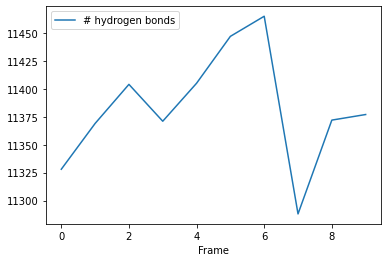

In [10]:
frame_hbs.plot(x='Frame', y='# hydrogen bonds');

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.

[4] Paul Smith, Robert&nbsp;M. Ziolek, Elena Gazzarrini, Dylan&nbsp;M. Owen, and Christian&nbsp;D. Lorenz.
On the interaction of hyaluronic acid with synovial fluid lipid membranes.
<em>Physical Chemistry Chemical Physics</em>, 21(19):9845–9857, May 2019.
00003.
URL: <a href="https://pubs.rsc.org/en/content/articlelanding/2019/cp/c9cp01532a">https://pubs.rsc.org/en/content/articlelanding/2019/cp/c9cp01532a</a>, <a href="https://doi.org/10.1039/C9CP01532A">doi:10.1039/C9CP01532A</a>.